In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
#preprocessing :
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.drop(['Id'] , axis=1 , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

17

<ipython-input-10-cb310ccd5a83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

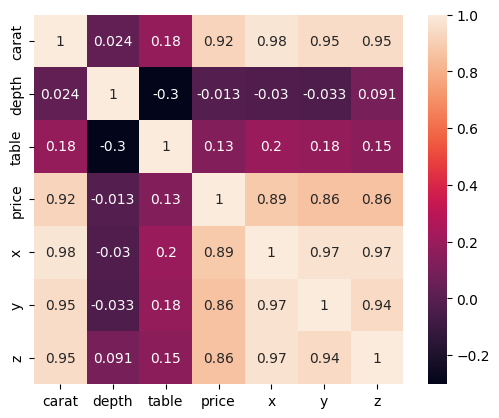

In [ ]:
corr = df.corr()

sns.heatmap(data=corr, square=True , annot=True, cbar=True)


In [ ]:
corr["price"].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
depth   -0.013137
Name: price, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


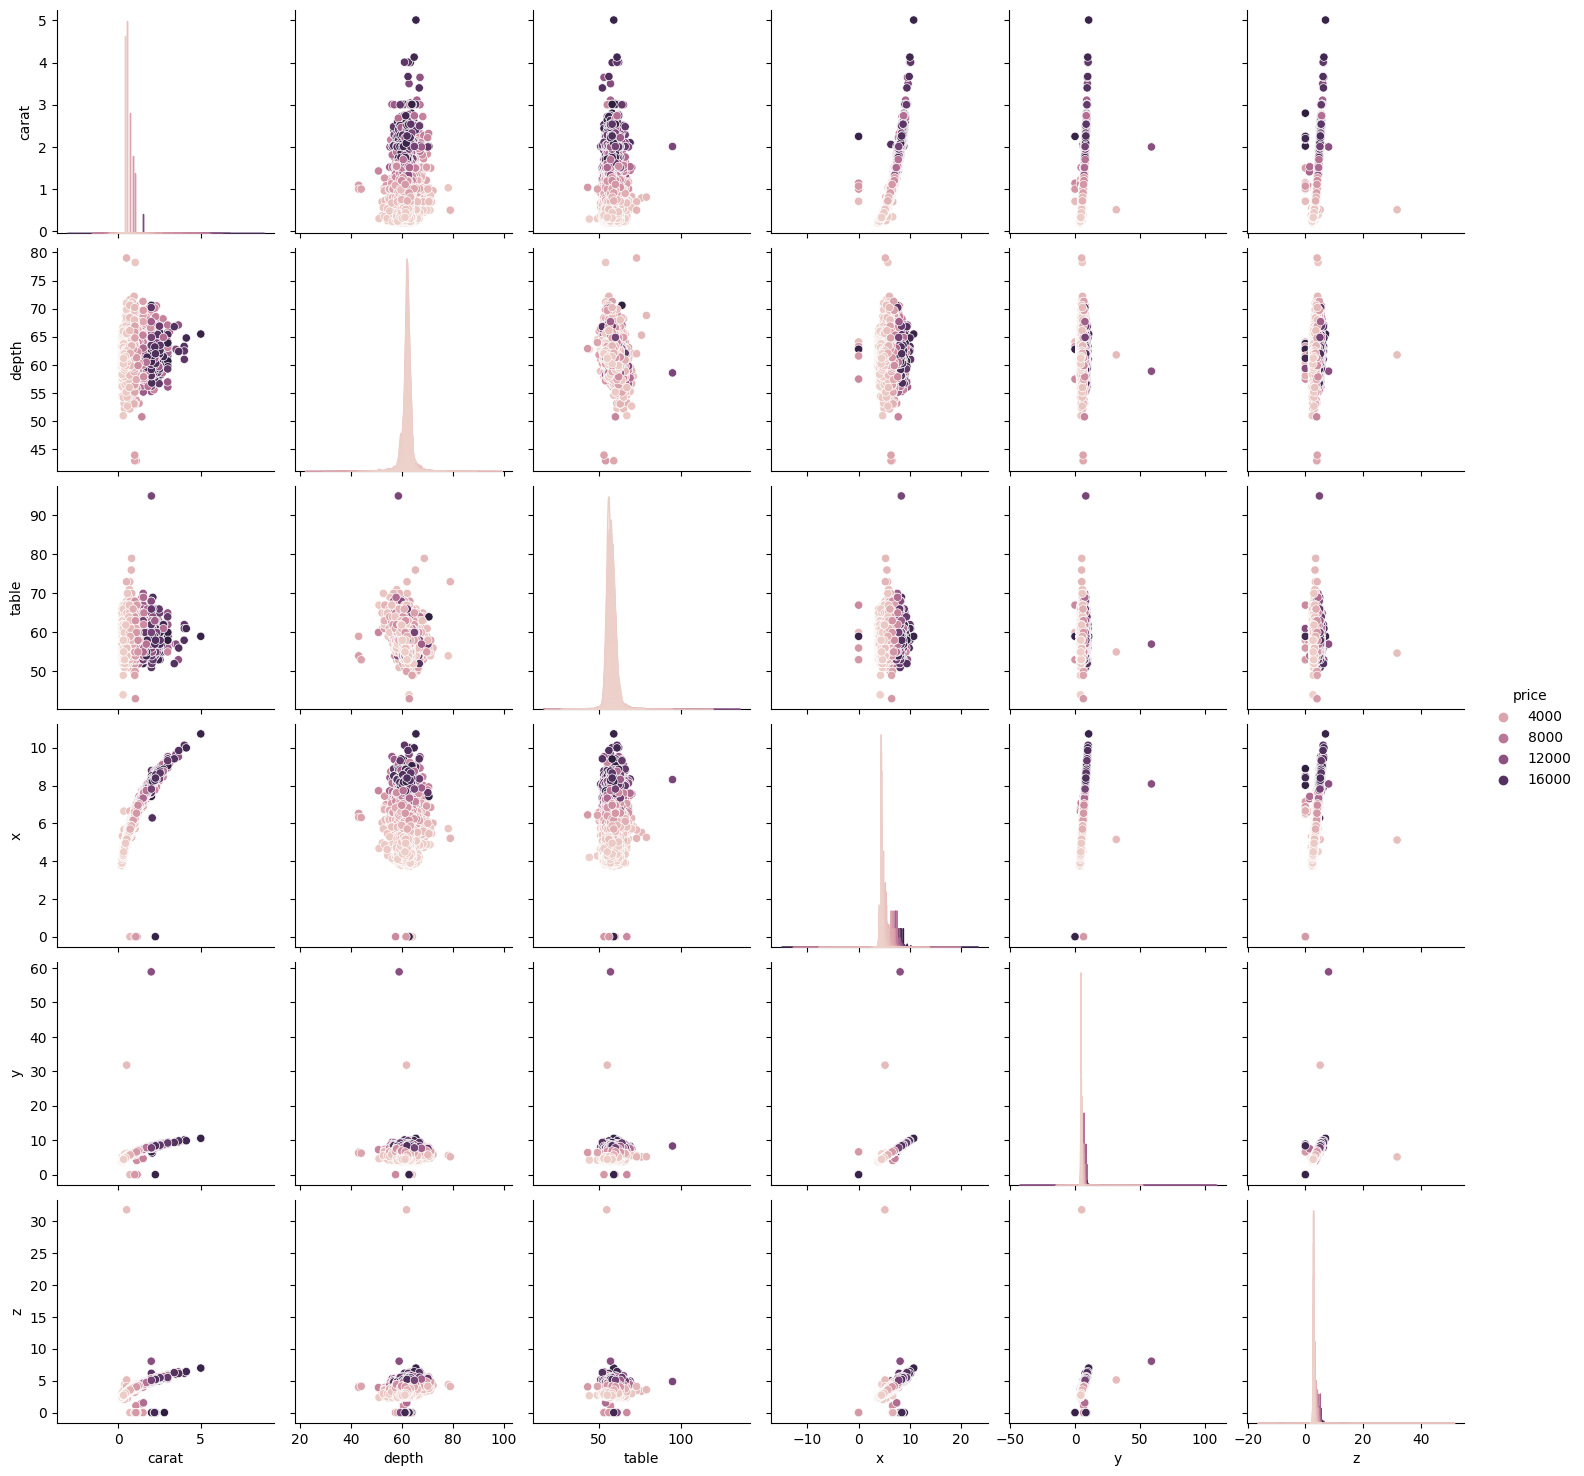

In [ ]:
sns.pairplot(df, hue='price', size=2.5);

<Axes: xlabel='carat', ylabel='price'>

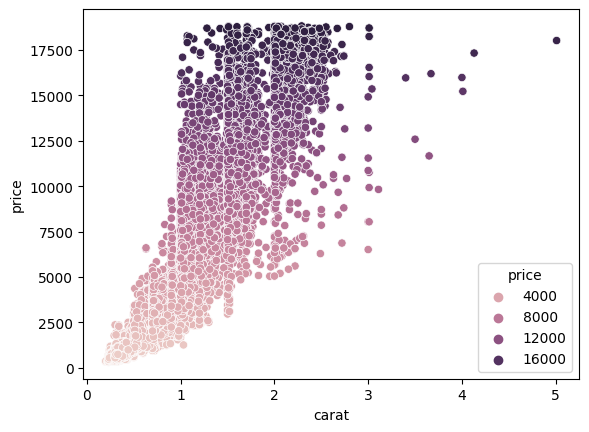

In [ ]:
# checking correlation & outliers of price with relation to cut 
sns.scatterplot( x=df["carat"], y=df["price"],hue=df["price"] )

In [ ]:
len(df.loc[(df['carat']>3)])

21

<Axes: xlabel='depth', ylabel='price'>

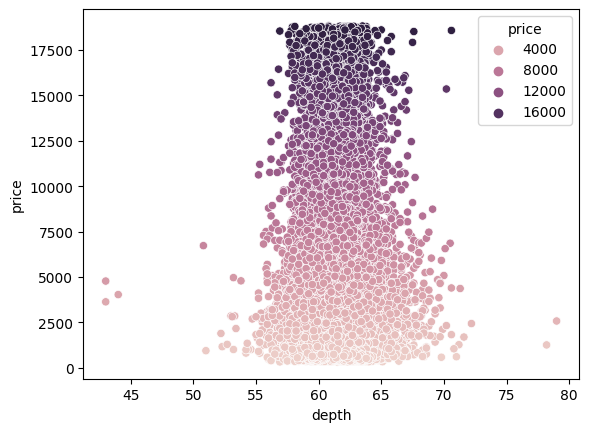

In [ ]:
#depth
sns.scatterplot( x=df["depth"], y=df["price"], hue=df["price"] )
# small negative correlation because in the same depth there is different price

(2.0, 10.0)

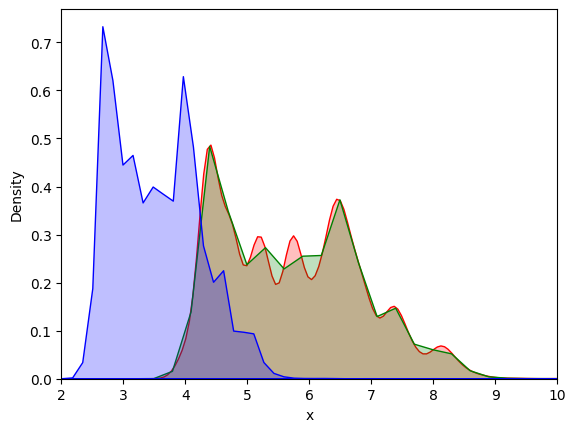

In [ ]:
#Dimensions
sns.kdeplot(df['x'] ,fill=True , color='r' )
sns.kdeplot(df['y'] , fill=True , color='g' )
sns.kdeplot(df['z'] , fill= True , color='b')
plt.xlim(2,10)

In [ ]:
categorical_data = df.select_dtypes(exclude=[np.number]).columns

In [ ]:
def pie(column):
    labels=df[column].unique()
    size=[]
    for i in labels:
        value=df[column].value_counts()[[i]]
        size.append(int(value.values))
    return labels,size

In [ ]:
labels,sizes=pie('cut')
labels2,sizes2=pie('color')
labels3,sizes3=pie('clarity')

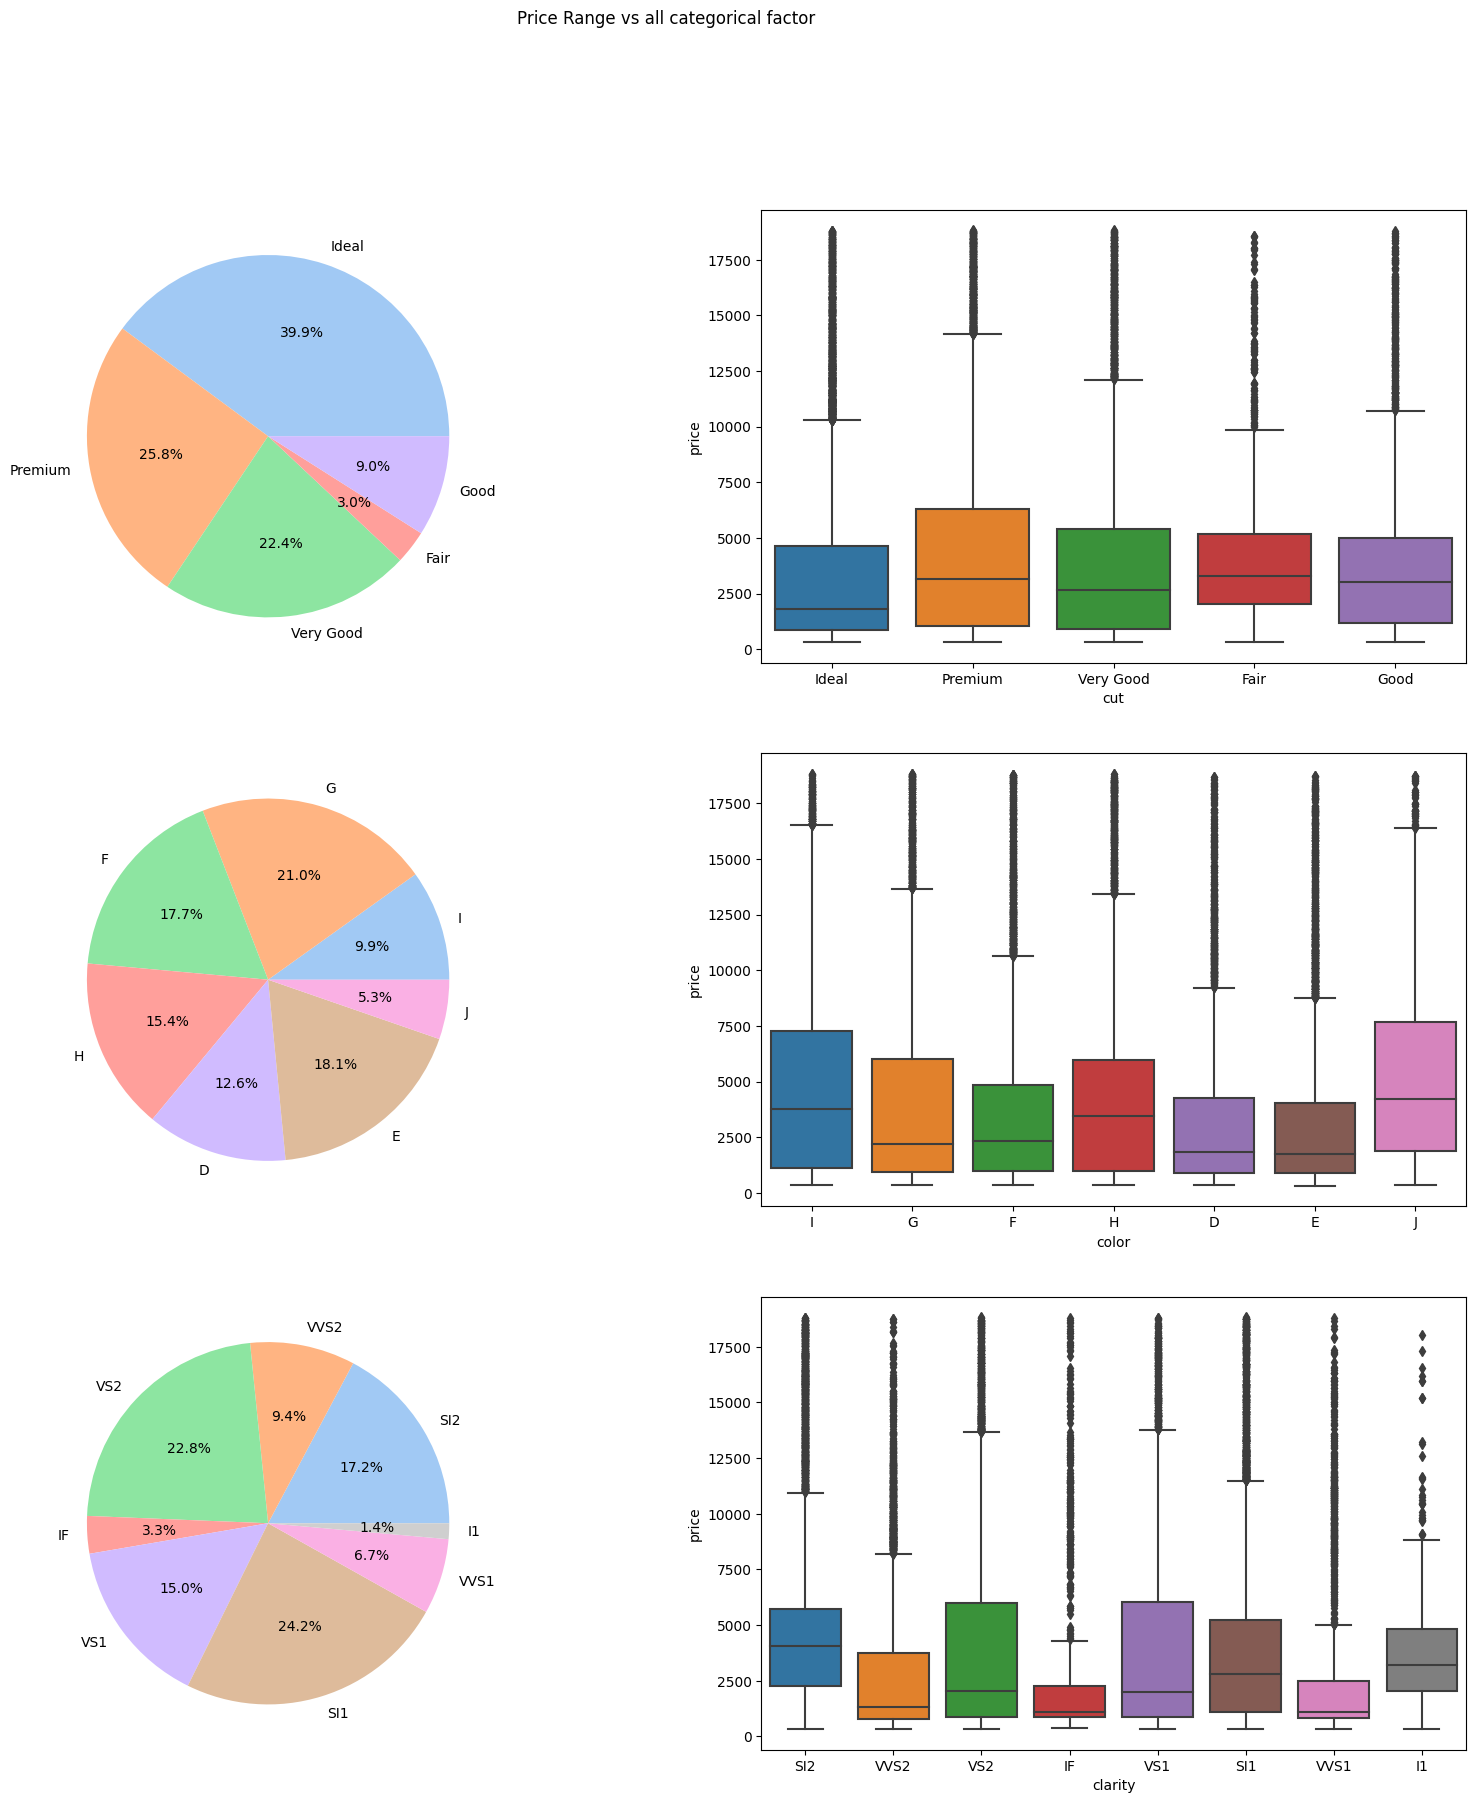

In [ ]:
# visualstion for categorical 
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
colors = sns.color_palette('pastel')[0:8]
fig.suptitle('Price Range vs all categorical factor')
axes[0,0].pie(x=sizes, labels=labels,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[0, 1], data=df, x='cut', y='price')
axes[1,0].pie(x=sizes2, labels=labels2,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[1, 1], data=df, x='color', y='price')
axes[2,0].pie(x=sizes3, labels=labels3,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[2, 1], data=df, x='clarity', y='price')
plt.show()

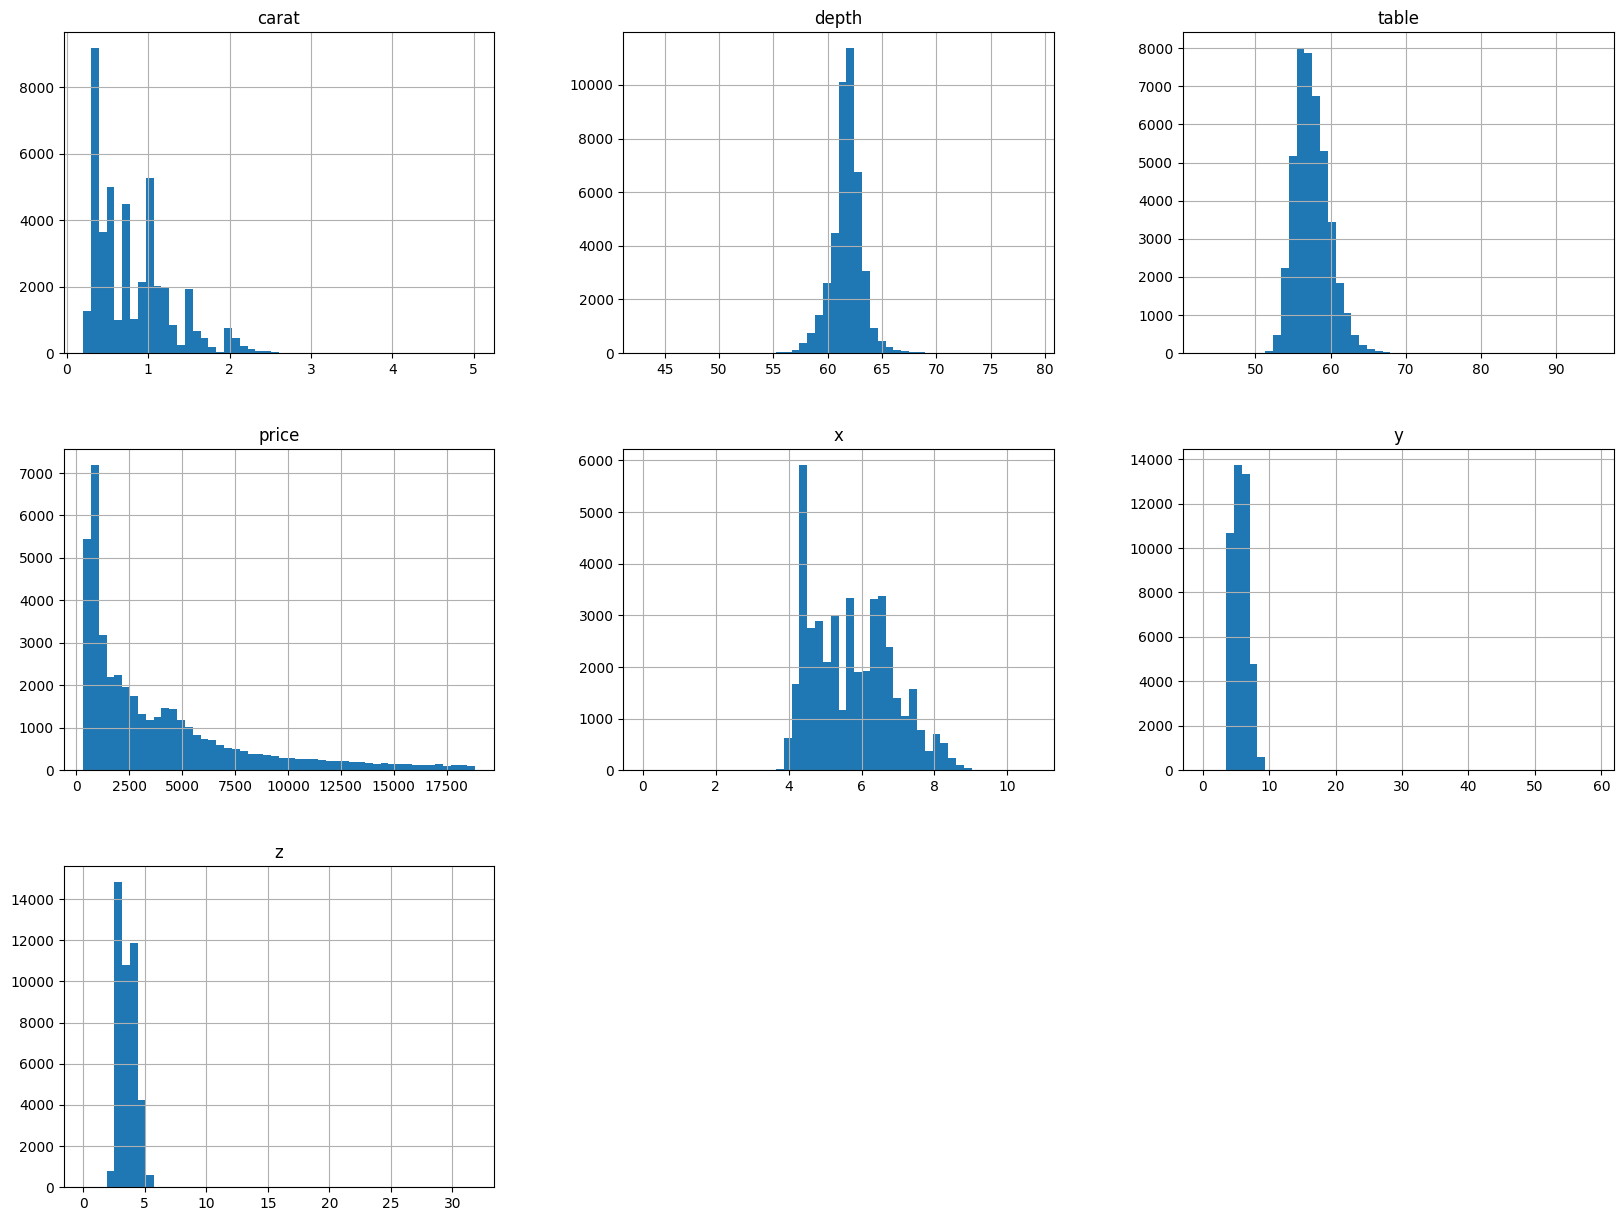

In [ ]:
#distributions
df.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-22-95d28cc1e39d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'] , fit=norm);



 mu = 3929.49 and sigma = 3985.48



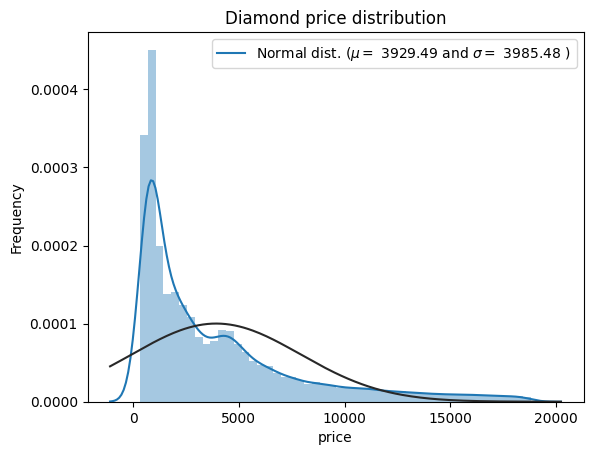

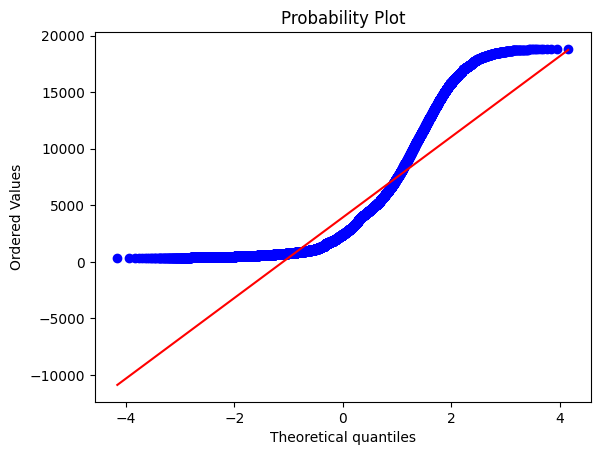

In [ ]:
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Diamond price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#df["price"] = np.log1p(df["price"])

#Check the new distribution 
#sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(df['price'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
#plt.title('Diamond price distribution')

#Get also the QQ-plot
#fig = plt.figure()
#res = stats.probplot(df['price'], plot=plt)
#plt.show()

**Preprocessing Data**

In [ ]:
#drop the incorrect value 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(43135, 10)

In [ ]:
#function for replace all outliers with Nan
def outlier_detect(columns):
    for column in columns: 
        for x in [column]:
            q75,q25 = np.percentile(df.loc[:,x],[75,25])
            intr_qr = q75-q25

            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)

            df.loc[df[x] < min,x] = np.nan
            df.loc[df[x] > max,x] = np.nan


In [ ]:
numeric_data = df.select_dtypes(include=[np.number]).columns
outlier_detect(list(numeric_data))

In [ ]:
#sum of outliers in data
df.isnull().sum()

carat      1498
cut           0
color         0
clarity       0
depth      2054
table       471
price      2838
x            16
y            15
z            22
dtype: int64

In [ ]:
#convert categorical value

label_cut = preprocessing.LabelEncoder()
label_color = preprocessing.LabelEncoder()
label_clarity = preprocessing.LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270.0,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,NaN,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828.0,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577.0,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596.0,5.76,5.72,3.50


Feature Engieenring

In [ ]:
#add volume col
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.06,2,5,3,61.8,57.0,4270.0,6.57,6.60,4.07,176.483340
1,1.51,3,3,7,60.9,58.0,NaN,7.38,7.42,4.51,246.965796
2,0.32,2,2,5,61.3,56.0,828.0,4.43,4.41,2.71,52.943373
3,0.53,2,3,5,61.2,56.0,1577.0,5.19,5.22,3.19,86.422842
4,0.70,3,4,7,61.0,57.0,2596.0,5.76,5.72,3.50,115.315200


<Axes: xlabel='volume', ylabel='price'>

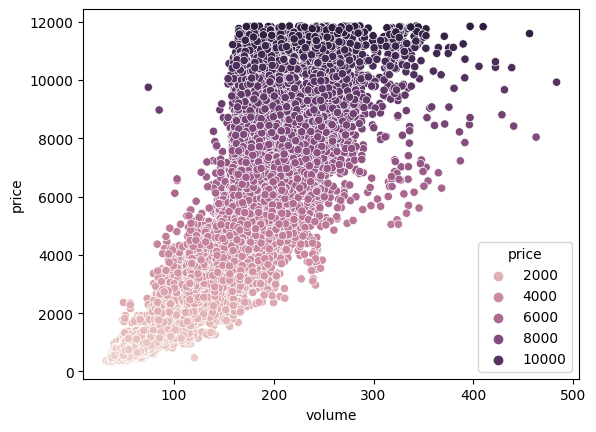

In [ ]:
sns.scatterplot( x=df["volume"], y=df["price"], hue=df["price"] )

In [ ]:
df.drop(['x','y','z'], axis=1, inplace= True)
df=df.dropna()

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,2,5,3,61.8,57.0,4270.0,176.483340
2,0.32,2,2,5,61.3,56.0,828.0,52.943373
3,0.53,2,3,5,61.2,56.0,1577.0,86.422842
4,0.70,3,4,7,61.0,57.0,2596.0,115.315200
5,0.90,4,3,1,63.1,58.0,5670.0,145.652094


In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_vali, y_train, y_vali = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_vali = sc.transform(X_vali)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_vali_predict = linreg.predict(X_vali)
rmse = (np.sqrt(mean_squared_error(y_vali,y_vali_predict)))
rmse

964.1159844283945

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_vali,y_vali_predict)
r2

0.8796294731831087

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_ml = DecisionTreeRegressor(random_state=42)
tree_ml.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# CODE HERE
tree_predictions = tree_ml.predict(X_vali)
tree_rmse = mean_squared_error (y_vali, tree_predictions,squared=False)
tree_rmse

501.3174690063031

In [ ]:
# CODE HERE
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_ml, X_vali,
y_vali,
scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count     10.000000
mean     603.059782
std       51.962438
min      554.430249
25%      570.852843
50%      594.175822
75%      614.809691
max      735.485975
dtype: float64

In [ ]:
tree_score = tree_ml.score(X_vali,y_vali)
tree_score

0.9674547755101112

In [ ]:
# CODE HERE
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_vali_predict = forest_reg.predict(X_vali)
rmse = (np.sqrt(mean_squared_error(y_vali,y_vali_predict)))
rmse

391.7249811180833

In [ ]:
r2 = r2_score(y_vali,y_vali_predict)
r2

0.9801287983114869

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
forest_rmses = -cross_val_score(forest_reg, X_vali,
y_vali,
scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count     10.000000
mean     441.229381
std       42.466229
min      396.977525
25%      417.205435
50%      430.419089
75%      433.883184
max      534.985676
dtype: float64

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_vali_predict = xgb_model.predict(X_vali)
rmse = (np.sqrt(mean_squared_error(y_vali,y_vali_predict)))
rmse 

380.359811830089

In [ ]:
r2 = r2_score(y_vali,y_vali_predict)
r2

0.9812651231568601

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
df_test.describe()

,Id,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,5394.500000,0.798279,61.758315,57.452531,5.729514,5.732559,3.539398
std,3114.371686,0.475700,1.421266,2.236933,1.123736,1.115090,0.695483
min,1.000000,0.200000,54.000000,50.000000,0.000000,0.000000,0.000000
25%,2697.750000,0.400000,61.100000,56.000000,4.720000,4.727500,2.910000
50%,5394.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,8091.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,10788.000000,4.500000,79.000000,73.000000,10.230000,10.160000,6.720000


In [ ]:
df_test.loc[df_test[(df_test['z']==0)|(df_test['z']>15)].index,'z']=df_test['z'].median()
df_test.loc[df_test[df_test['x']==0].index,'x']=df_test['x'].median()
df_test.loc[df_test[(df_test['y']==0)|(df_test['y']>15)].index,'y']=df_test['y'].median() 

In [ ]:
df_test['volume']=df_test['x']*df_test['y']*df_test['z'] 

In [ ]:
df_test.drop(['x','y','z'], axis=1, inplace= True)


In [ ]:
df_test.isnull().sum() 

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
volume     0
dtype: int64

In [ ]:
Id = df_test.Id 

In [ ]:
Id   

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [ ]:
df_test.head()

,Id,carat,cut,color,clarity,depth,table,volume
0,1,0.34,Ideal,G,VVS2,61.1,57.0,55.686400
1,2,0.71,Premium,E,VS2,62.7,58.0,116.719456
2,3,0.44,Very Good,I,VS1,62.8,56.0,71.889720
3,4,0.81,Premium,E,SI2,60.1,59.0,134.037855
4,5,0.40,Ideal,G,VVS1,61.2,56.0,66.435840


In [ ]:
#convert categorical value

df_test['cut'] = label_cut.fit_transform(df_test['cut'])
df_test['color'] = label_color.fit_transform(df_test['color'])
df_test['clarity'] = label_clarity.fit_transform(df_test['clarity'])

In [ ]:
df_test.head()

,Id,carat,cut,color,clarity,depth,table,volume
0,1,0.34,2,3,7,61.1,57.0,55.686400
1,2,0.71,3,1,5,62.7,58.0,116.719456
2,3,0.44,4,5,4,62.8,56.0,71.889720
3,4,0.81,3,1,3,60.1,59.0,134.037855
4,5,0.40,2,3,6,61.2,56.0,66.435840


In [ ]:
df_test.drop('Id',axis=1,inplace=True)

In [ ]:
df_test=sc.transform(df_test)

In [ ]:
df_test

array([[-9.94029446e-01, -6.59827377e-01,  2.77855938e-01, ...,
        -6.19957235e-01, -1.24209540e-01, -9.98832394e-01],
       [ 6.83782113e-03,  3.95799178e-01, -9.10012882e-01, ...,
         8.26942881e-01,  3.69891021e-01,  2.36678980e-02],
       [-7.23524779e-01,  1.45142573e+00,  1.46572476e+00, ...,
         9.17374138e-01, -6.18310100e-01, -7.27374589e-01],
       ...,
       [ 6.83782113e-03, -6.59827377e-01, -9.10012882e-01, ...,
         4.65217852e-01, -1.11241066e+00,  5.25400249e-04],
       [ 1.08885649e+00,  3.95799178e-01, -9.10012882e-01, ...,
        -7.10388493e-01,  1.35809214e+00,  1.10173702e+00],
       [ 3.49634802e+00,  3.95799178e-01, -3.16078472e-01, ...,
        -2.58232206e-01,  8.63991582e-01,  3.33018356e+00]])

In [ ]:
y_test_predict = xgb_model.predict(df_test)


In [ ]:
y_test_predict

array([  816.0024 ,  2882.2354 ,   859.07446, ...,  4196.599  ,
        4375.9316 , 11506.808  ], dtype=float32)

In [ ]:
R = pd.DataFrame({'Id' : Id , 'price' : y_test_predict})
R.to_csv("result.csv" , index=False) 

# New Section